In [0]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
from sklearn.preprocessing import MinMaxScaler

In [0]:
t = pd.read_csv('fire_raw.csv')
t['date'] = t['FIRE_YEAR'].apply(lambda x: datetime.datetime(x, 1, 1)) + t['DISCOVERY_DOY'].apply(lambda x: datetime.timedelta(x - 1))
t['year'] = t['date'].apply(lambda x: x.year)
t['month'] = t['date'].apply(lambda x: x.month)
t['quarter'] = t['date'].apply(lambda x: x.quarter)
t['day'] = t['date'].apply(lambda x: x.day)
t['weekday'] = t['date'].apply(lambda x: x.weekday())
t['weekday'] = (t['weekday'] < 5).astype(int)

In [0]:
del t['FIRE_YEAR'], t['DISCOVERY_DOY']
t.head()

,Unnamed: 0,FIRE_SIZE,STATE,FIPS_CODE,date,year,month,quarter,day,weekday
0,0,0.10,CA,63.0,2005-02-02,2005,2,1,2,1
1,1,0.25,CA,61.0,2004-05-12,2004,5,2,12,1
2,2,0.10,CA,17.0,2004-05-31,2004,5,2,31,1
3,3,0.10,CA,3.0,2004-06-28,2004,6,2,28,1
4,4,0.10,CA,3.0,2004-06-28,2004,6,2,28,1


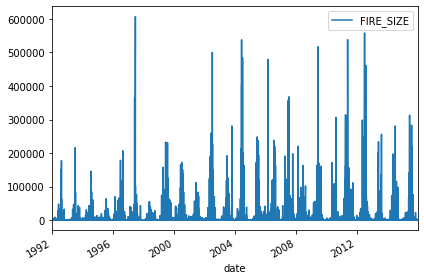

In [0]:
import matplotlib.pyplot as plt
t1 = t.loc[:, ['date', 'FIRE_SIZE']]
t1.set_index('date', inplace = True)
t1.plot()
plt.tight_layout()

((array([-4.95129615, -4.77585527, -4.68112729, ...,  4.68112729,
          4.77585527,  4.95129615]),
  array([1.000000e-05, 9.000000e-05, 1.000000e-04, ..., 5.380490e+05,
         5.581983e+05, 6.069450e+05])),
 (240.92296801859422, 74.520158339924, 0.09646160835835878))

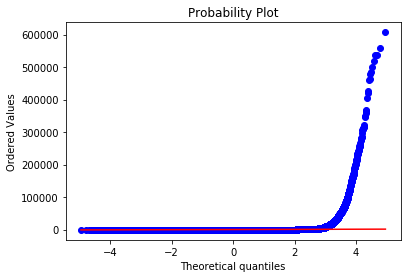

In [0]:
from scipy import stats
stats.probplot(t['FIRE_SIZE'], plot=plt)

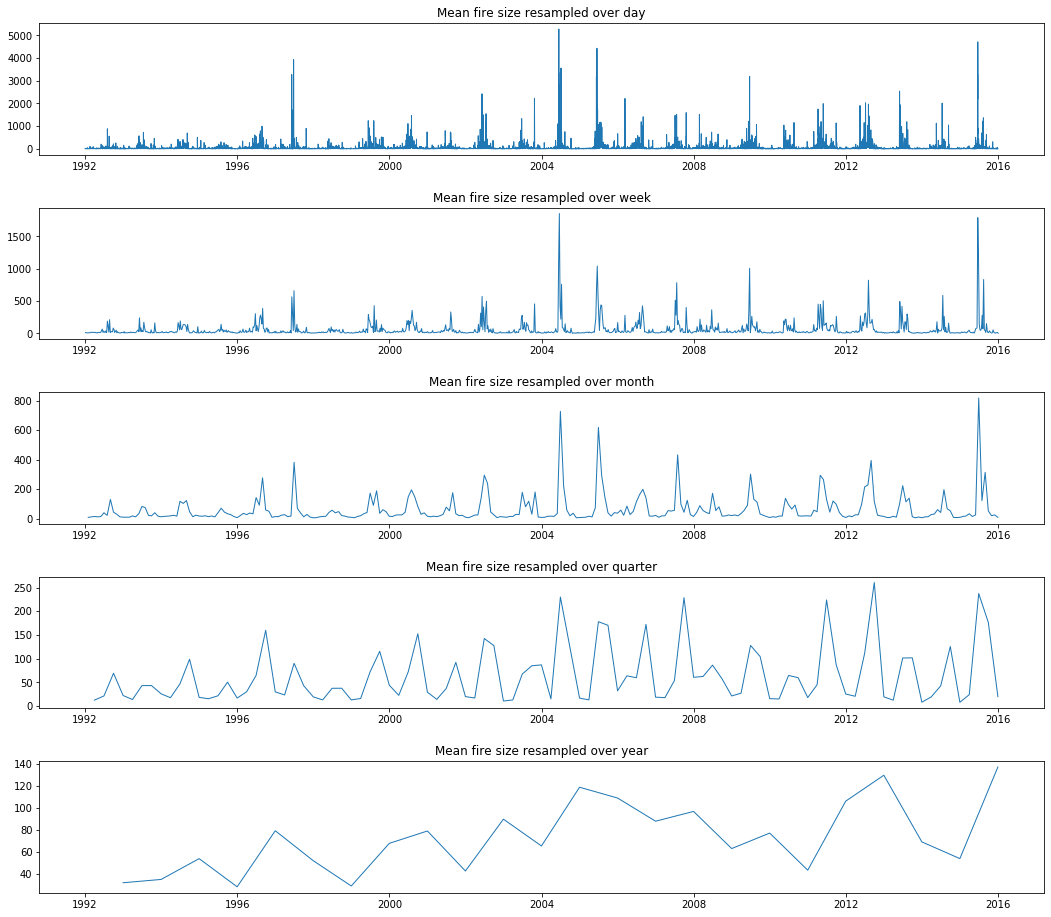

In [0]:
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(5,1,1)
ax1.plot(t1['FIRE_SIZE'].resample('D').mean(),linewidth=1)
ax1.set_title('Mean fire size resampled over day')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(t1['FIRE_SIZE'].resample('W').mean(),linewidth=1)
ax2.set_title('Mean fire size resampled over week')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(t1['FIRE_SIZE'].resample('M').mean(),linewidth=1)
ax3.set_title('Mean fire size resampled over month')
ax3.tick_params(axis='both', which='major')

ax4  = fig.add_subplot(5,1,4, sharex=ax1)
ax4.plot(t1['FIRE_SIZE'].resample('Q').mean(),linewidth=1)
ax4.set_title('Mean fire size resampled over quarter')
ax4.tick_params(axis='both', which='major')

ax5  = fig.add_subplot(5,1,5, sharex=ax1)
ax5.plot(t1['FIRE_SIZE'].resample('A').mean(),linewidth=1)
ax5.set_title('Mean fire size resampled over year')
ax5.tick_params(axis='both', which='major')

Text(0.5, 1.0, 'Mean fire size by Day')

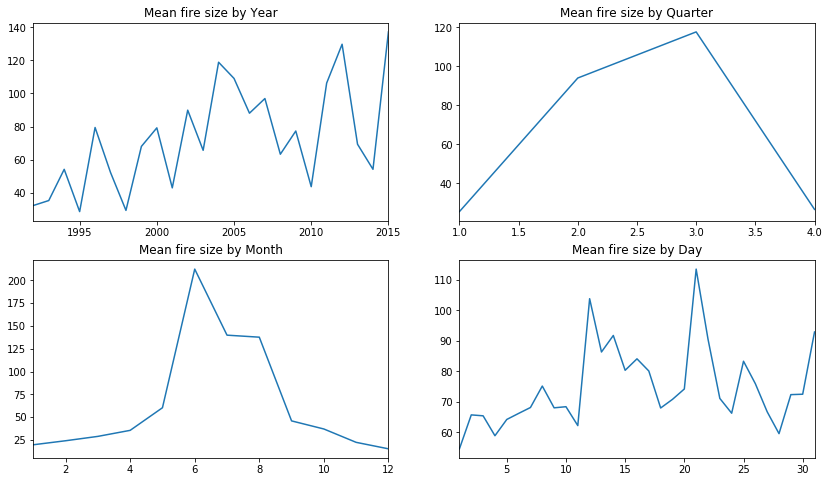

In [0]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
t.groupby('year').FIRE_SIZE.agg('mean').plot()
plt.xlabel('')
plt.title('Mean fire size by Year')

plt.subplot(2,2,2)
t.groupby('quarter').FIRE_SIZE.agg('mean').plot()
plt.xlabel('')
plt.title('Mean fire size by Quarter')

plt.subplot(2,2,3)
t.groupby('month').FIRE_SIZE.agg('mean').plot()
plt.xlabel('')
plt.title('Mean fire size by Month')

plt.subplot(2,2,4)
t.groupby('day').FIRE_SIZE.agg('mean').plot()
plt.xlabel('')
plt.title('Mean fire size by Day')

In [0]:

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [0]:
td=t1.resample('D', how=np.mean)
tm=t1.resample('M', how=np.mean)
tq=t1.resample('Q', how=np.mean)
ta=t1.resample('A', how=np.mean)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  after removing the cwd from sys.path.


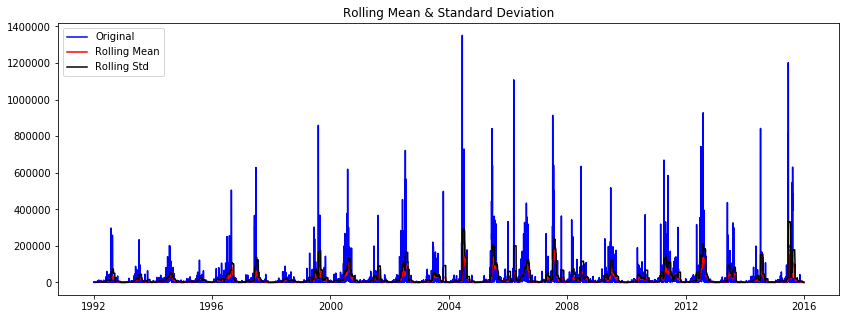

<Results of Dickey-Fuller Test>
Test Statistic                -1.064970e+01
p-value                        4.695606e-19
#Lags Used                     3.700000e+01
Number of Observations Used    8.728000e+03
Critical Value (1%)           -3.431099e+00
Critical Value (5%)           -2.861871e+00
Critical Value (10%)          -2.566946e+00
dtype: float64


In [0]:
test_stationarity(t1)

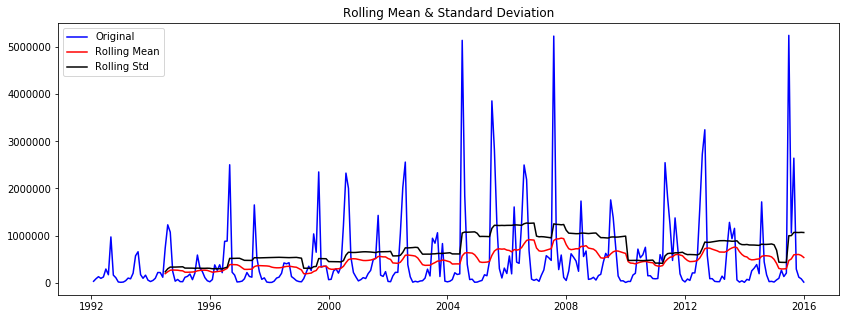

<Results of Dickey-Fuller Test>
Test Statistic                  -3.218357
p-value                          0.018946
#Lags Used                      11.000000
Number of Observations Used    276.000000
Critical Value (1%)             -3.454267
Critical Value (5%)             -2.872070
Critical Value (10%)            -2.572381
dtype: float64


In [0]:
test_stationarity(t1.resample('M').sum().FIRE_SIZE)

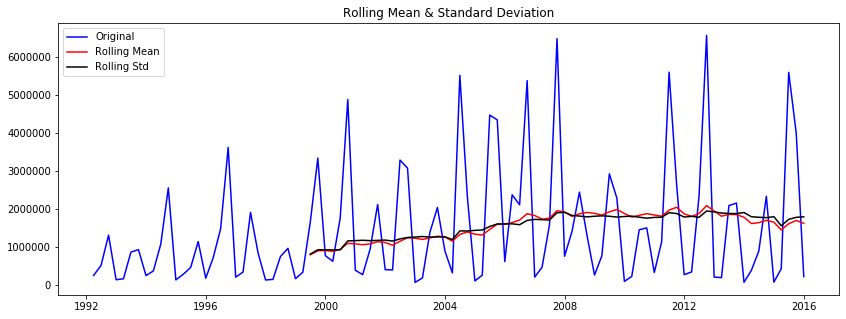

<Results of Dickey-Fuller Test>
Test Statistic                 -2.145810
p-value                         0.226497
#Lags Used                     10.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


In [0]:
test_stationarity(tq.FIRE_SIZE)

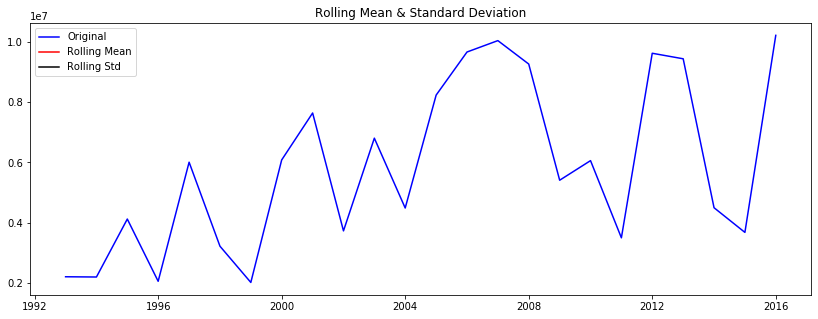

<Results of Dickey-Fuller Test>
Test Statistic                 -3.153003
p-value                         0.022871
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [0]:
test_stationarity(ta.FIRE_SIZE)

In [0]:

# dataset = t1.FIRE_SIZE.values
# dataset = dataset.astype('float32')
# dataset = np.reshape(dataset, (-1, 1))
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(dataset)
# train_size = int(len(dataset) * 0.80)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# look_back = 30
# X_train, Y_train = create_dataset(train, look_back)
# X_test, Y_test = create_dataset(test, look_back)

# # reshape input to be [samples, time steps, features]
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [0]:
import math
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

# model = Sequential()
# model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')

# history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# model.summary()

Using TensorFlow backend.


In [0]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 96.30595902776568
Train Root Mean Squared Error: 2422.5442894934954
Test Mean Absolute Error: 114.75616735986351
Test Root Mean Squared Error: 2745.3808867408434


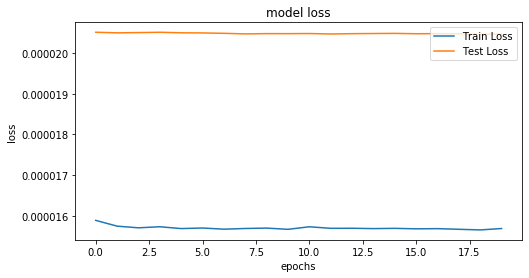

In [0]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

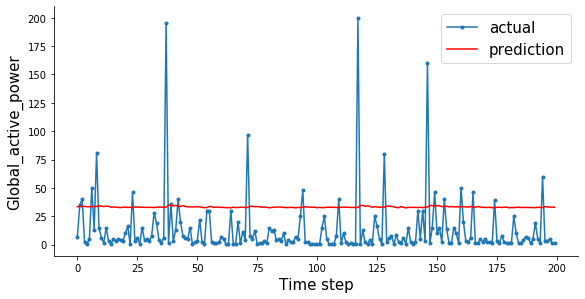

In [0]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [0]:
day_sum = t1.groupby(['date']).sum()
# def daterange(start_date, end_date):
#     for n in range(int((end_date - start_date)).days):
#         yield start_date - datetime.timedelta(n)

# start = day_sum.index.min()
# end = day_sum.index.max()

# for date in daterange(start, end):
#     if date not in day_sum.index:
#       day_sum[f'{date}'] = 0


In [0]:
t1.groupby(['date']).count().FIRE_SIZE

date
1992-01-01    129
1992-01-02     46
1992-01-03     43
1992-01-04     68
1992-01-05     44
             ... 
2015-12-27     11
2015-12-28     20
2015-12-29     26
2015-12-30     17
2015-12-31     22
Name: FIRE_SIZE, Length: 8766, dtype: int64

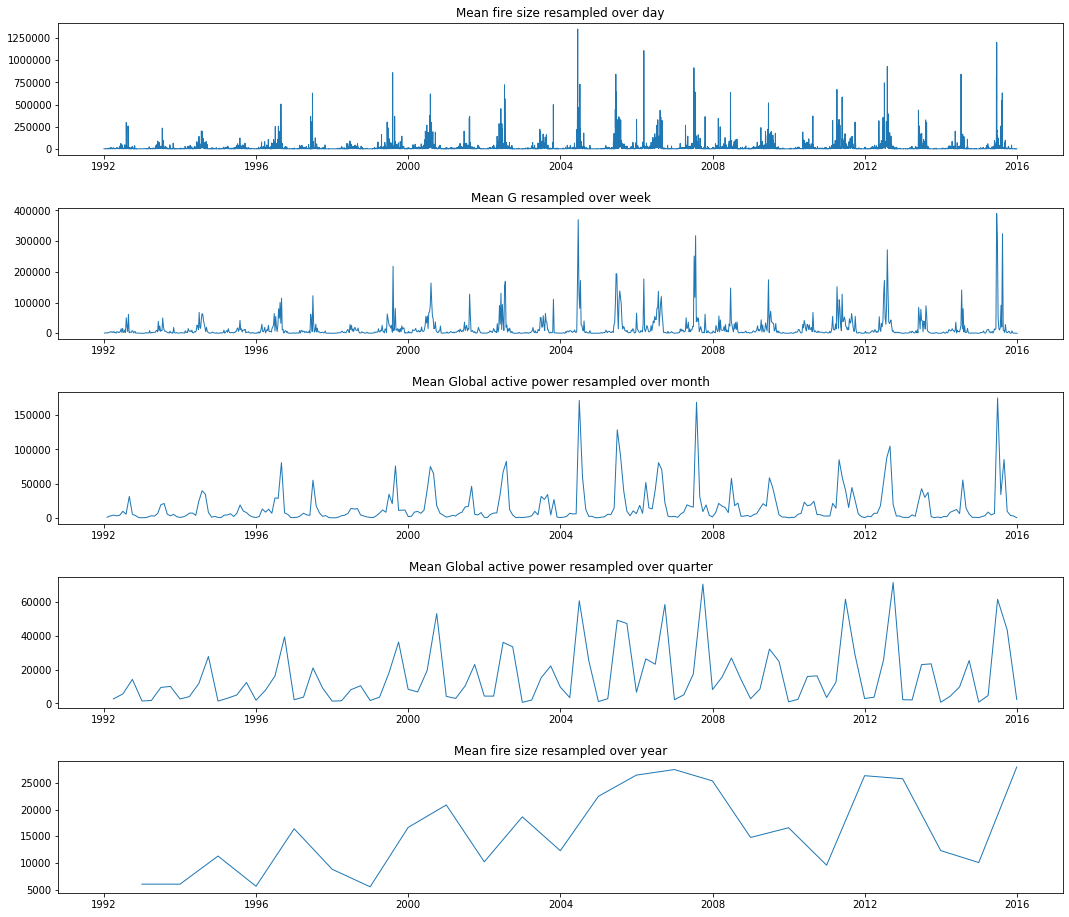

In [0]:
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(5,1,1)
ax1.plot(day_sum['FIRE_SIZE'].resample('D').mean(),linewidth=1)
ax1.set_title('Mean fire size resampled over day')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(day_sum['FIRE_SIZE'].resample('W').mean(),linewidth=1)
ax2.set_title('Mean G resampled over week')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(day_sum['FIRE_SIZE'].resample('M').mean(),linewidth=1)
ax3.set_title('Mean Global active power resampled over month')
ax3.tick_params(axis='both', which='major')

ax4  = fig.add_subplot(5,1,4, sharex=ax1)
ax4.plot(day_sum['FIRE_SIZE'].resample('Q').mean(),linewidth=1)
ax4.set_title('Mean Global active power resampled over quarter')
ax4.tick_params(axis='both', which='major')

ax5  = fig.add_subplot(5,1,5, sharex=ax1)
ax5.plot(day_sum['FIRE_SIZE'].resample('A').mean(),linewidth=1)
ax5.set_title('Mean fire size resampled over year')
ax5.tick_params(axis='both', which='major')

In [0]:
dataset = t1.resample('M').sum().FIRE_SIZE.values
dataset = np.log(dataset)
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 12

X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
best_rmse = None
best_lb = 0 #51 number #4 acre log
best_model_acre = None
for i in range(48):
  look_back = i + 1
  X_train, Y_train = create_dataset(train, look_back)
  X_test, Y_test = create_dataset(test, look_back)

  # reshape input to be [samples, time steps, features]
  X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
  X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

  model = Sequential()
  model.add(LSTM(100, activation = 'relu', input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  history = model.fit(X_train, Y_train, epochs=1000, batch_size=70, validation_data=(X_test, Y_test), 
                      callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

  test_predict = model.predict(X_test)
  test_predict = scaler.inverse_transform(test_predict)
  test_predict = np.exp(test_predict) #Inversing the log
  Y_test = scaler.inverse_transform([Y_test])
  Y_test = np.exp(Y_test) #Inverse Log
  rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
  if best_rmse == None:
    best_rmse = rmse
    best_lb = i+1
    best_model_acre = model
  if rmse < best_rmse:
    best_rmse = rmse
    best_lb = i+1
    best_model_acre = model

In [0]:
test_pr

In [0]:
best_model_acre.predict(X_test[:4])


In [0]:
dataset = t1.resample('M').count().FIRE_SIZE.values
# dataset = np.log(dataset)
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
start_set = dataset[-4:,:]
start, Y_start = create_dataset(start_set, 4)
start = np.reshape(start, (start.shape[0], 1, start.shape[1]))

for n in range(recent.shape[0]):
  transform
  look_back = 51
  next_month = best_model.predict()
  append(next_month)
  delete the last date

In [0]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=1000, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

In [0]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 0.6357733525062398
Train Root Mean Squared Error: 0.8095546311047074
Test Mean Absolute Error: 0.7019759332653435
Test Root Mean Squared Error: 0.9167894394725545


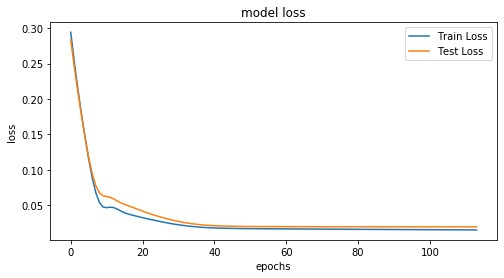

In [0]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

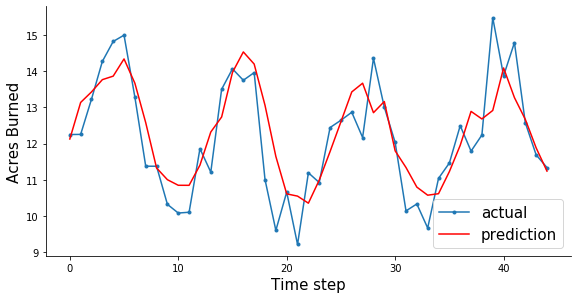

In [0]:
aa=[x for x in range(45)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][-45:], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][-45:], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Acres Burned', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

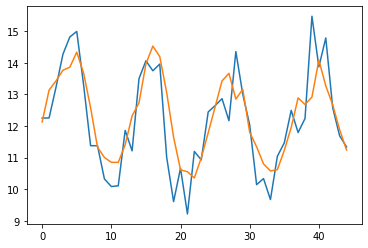

In [0]:
plt.plot(Y_test[0])
plt.plot(test_predict)

In [0]:
lis = [[3131, 439], [123490, 2455], [649511, 6324], [687131, 6267], [134720, 4942], [526926, 5230], [1353260, 8195], [1116726, 6507], [285893, 4762], [126963, 6555], [275616, 8560], [163153, 5339], [54961, 2459], [167766, 5353], [957427, 6717], [817985, 5953], [234986, 4182], [600373, 5336], [2657380, 9000], [1648583, 7493], [1325423, 3033], [366641, 3408], [354376, 3252], [595161, 9945], [71189, 3257], [67289, 3200], [392010, 6297], [446198, 4938], [707411, 6197], [812501, 5112], [2313597, 8717], [2129088, 7861], [841953, 3720], [466374, 1791], [236457, 1421], [98542, 3400], [13095, 1139], [27604, 1018], [130508, 4934], [40716, 3534], [120868, 5338], [1331968, 5657], [1570697, 5571], [1001587, 8765], [195898, 6627], [134013, 2314]]

idx = []
for n in range(4):
  for i in range(12):
    idx.append(datetime.date(2016 + n, 1 + i, 1))
len(idx)
idx = idx[:-2]
recent = pd.DataFrame(lis, columns = ['acres', 'amount'], index = idx)

ValueError: ignored